In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import particle
reload(particle)

<module 'particle' from 'particle.py'>

In [10]:
particle.gaussian_particles(4, [10000,20000,30000], [10, 100, 1000])

array([[ 9981.44495435, 19947.65249968, 29367.75942824],
       [ 9995.14085944, 19902.08606593, 30137.4115666 ],
       [10014.00762664, 20032.90877534, 29310.3136079 ],
       [10008.51401152, 20092.33826602, 30472.63595063]])

In [11]:
p1 = particle.uniform_particles(4, [10,20,30], [12, 25, 39])
p1

array([[10.81524735, 24.63812833, 36.34967615],
       [11.50138342, 24.68103065, 35.48726609],
       [10.66509658, 24.31572831, 33.60009105],
       [10.33335311, 24.73632378, 30.48528129]])

In [12]:
particle.predict(p1, [10,100, 1000], [1,1,1])

array([[  21.12634779,  123.89523064, 1037.18460451],
       [  22.46787715,  124.31614872, 1036.27050889],
       [  21.80197776,  123.30945041, 1032.74436086],
       [  19.24681981,  125.96782192, 1030.98397656]])

In [13]:
reload(particle)

a = np.array([
    [1,0,0],
    [1,2,3],
    [2,3,4],
    [1,1,1]])
x = particle.updateWeights(lambda x: 1, a)
x, np.sum(x)

(array([0.10667808, 0.43260094, 0.02812004, 0.43260094]), 1.0)

In [14]:
np.random.random(10)

array([0.25609561, 0.63764968, 0.78146404, 0.22704321, 0.43703979,
       0.97314865, 0.94314401, 0.52844305, 0.83328317, 0.11694031])

In [15]:
np.prod(a, axis=1)

array([ 0,  6, 24,  1])

In [16]:
p2 = particle.uniform_particles(N=20, low=[0,0,0], high=[10,10,np.pi])
mean, std = particle.estimate(p2,[1.0]*20)
mean, std

(array([4.32508156, 4.48034333, 1.88318066]),
 array([2.65096335, 2.53077897, 0.94852607]))

In [17]:
p2[0] = mean
((p2 - mean)/std)[0]

array([0., 0., 0.])

In [18]:
p2[8]

array([6.63500249, 0.63686827, 3.12625891])

In [19]:
particles = p2
zscore = (particles - mean)/std
prior = scipy.stats.norm.pdf(zscore)

In [20]:
prior

array([[0.39894228, 0.39894228, 0.39894228],
       [0.35647308, 0.32492724, 0.09935956],
       [0.37001589, 0.04944057, 0.38839632],
       [0.34230011, 0.36436471, 0.35317496],
       [0.15820038, 0.10930151, 0.18632559],
       [0.36599877, 0.30567694, 0.14712429],
       [0.30591887, 0.35325758, 0.35795997],
       [0.30683963, 0.3694977 , 0.20460332],
       [0.27292308, 0.12591452, 0.16902785],
       [0.10295248, 0.35278051, 0.35922066],
       [0.2799146 , 0.398065  , 0.23667845],
       [0.19975586, 0.22467211, 0.29758429],
       [0.04405463, 0.18651602, 0.37602781],
       [0.32386294, 0.13623051, 0.22804711],
       [0.24004361, 0.39523001, 0.38091133],
       [0.22591732, 0.07367928, 0.32444205],
       [0.38224289, 0.39843314, 0.16282657],
       [0.33313227, 0.3858726 , 0.0684607 ],
       [0.33254058, 0.34469756, 0.32667519],
       [0.25889627, 0.30015911, 0.26608559]])

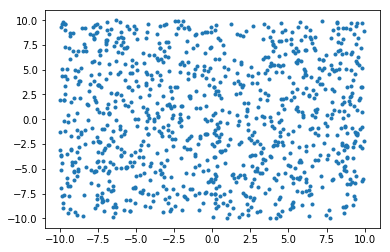

In [21]:
p1 = particle.uniform_particles(1000, [-10,-10], [10,10])
plt.plot(p1[:,0],p1[:,1], '.')

In [22]:
reload(particle)

<module 'particle' from 'particle.pyc'>

In [23]:
weights = particle.updateWeights(lambda x: 200-(x[:,0]**2 + x[:,1]**2), p1)
weights.shape

(1000,)

In [24]:
p2 = p1

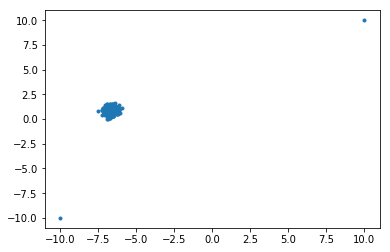

In [32]:
p2 = particle.predict(p2, [0,0], 0.1)
weights = particle.updateWeights(lambda x: -x[:,0], p2)
p2 = particle.simple_resample(p2, weights)
plt.plot(np.r_[p2[:,0],-10,10],np.r_[p2[:,1],-10,10], '.', )

In [26]:
particle.simple_resample(np.array([10,-2,-3,-4,5]),[1,2,50,2,1])

AttributeError: 'list' object has no attribute 'shape'